<a href="https://colab.research.google.com/github/Marytem/NSDUH_exploration/blob/master/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data processing

In [0]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis
from mlxtend.plotting import plot_sequential_feature_selection
from matplotlib import pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
data = pd.read_csv('prepared_data.csv')
data.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2283) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(56897, 2432)

In [0]:
data.describe()

,Unnamed: 0,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,pnr_user,trq_user,stm_user,sed_user,cig_user,alc_user,mj_user,coc_user,crack_user,her_user
count,56897.00000,56897.000000,56886.000000,56885.000000,56531.000000,56341.000000,56897.000000,56790.000000,56861.000000,56850.000000,...,56897.000000,56897.000000,56897.000000,56897.000000,56897.000000,56881.000000,56859.000000,56878.000000,56875.000000,56861.000000
mean,28448.00000,1.512751,78.090813,78.099077,519.117369,93.008857,47.982512,78.500229,92.979863,75.202375,...,0.049581,0.027734,0.030546,0.005695,0.437492,0.594961,0.179602,0.025247,0.003007,0.004397
std,16424.89347,0.499842,39.399555,39.385467,487.314111,12.930240,44.156738,28.116961,4.323097,34.456714,...,0.217079,0.164212,0.172087,0.075247,0.496082,0.490904,0.383859,0.238959,0.054750,0.066162
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14224.00000,1.000000,99.000000,99.000000,16.000000,91.000000,3.000000,91.000000,91.000000,91.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28448.00000,2.000000,99.000000,99.000000,991.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,42672.00000,2.000000,99.000000,99.000000,991.000000,99.000000,91.000000,93.000000,93.000000,93.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,56896.00000,2.000000,99.000000,99.000000,991.000000,99.000000,91.000000,93.000000,99.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000


In [0]:
data.head()

,Unnamed: 0,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,pnr_user,trq_user,stm_user,sed_user,cig_user,alc_user,mj_user,coc_user,crack_user,her_user
0,0,1,99.0,99.0,16.0,99.0,4,93.0,93.0,93.0,...,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
1,1,1,99.0,99.0,15.0,99.0,1,7.0,99.0,2.0,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,2,1,99.0,99.0,26.0,99.0,1,7.0,99.0,4.0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
3,3,2,4.0,4.0,991.0,91.0,91,91.0,91.0,91.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,4,1,99.0,99.0,5.0,99.0,4,93.0,93.0,93.0,...,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0


#### Dealing with missing values
Due to the cpecifics of the survey data I wanted to use 2 types of missing value imputation. For all drug-related columns I used global most common substitution, because thte data is categorical and because most peope do not use drugs. The rest columns with missing values were supposed to be imputed by the KNN model.

__BUT__

Unfortunately i can not afford to run it on so much data, so I used mode imputation in all dataset.

Columns with more than 20% of missing values are droped cince mode MVs imputation would influence data too much, and there are relatively not much of such columns and too much columns in a dataset anyway.

In [3]:
none_percs = data[data.columns[data.isnull().any()]].isnull().mean() * 100
nearly_empty_cols = [none_percs[none_percs == perc].index[0] for perc in none_percs if perc>20]
len(nearly_empty_cols)

357

In [0]:
data.drop(nearly_empty_cols, axis=1, inplace=True)

In [5]:
# number of cols with MVs, total part of MVs
len(data.columns[data.isnull().any()]),  data.isnull().values.ravel().sum()/(data.shape[0]*data.shape[1])

(1638, 0.059268863420781505)

##### Data Separation
I want to predict if a person uses particular drug using answers to the specific-drug-unrelated questions in the survey and then using questions not connected to any drug usage. For that I need to separate all drug related variables from general data.

##### Prefixes in variables-questions used for every type of drug:

In [0]:
halucinogens = ['LSD', 'PCP','PEYOTE','MESC','PSILCY','ECST','KET','DMTAMTFXY','SALVIADIV']
inhalants = ['AMYLNIT', 'CLEFLU', 'GAS', 'GLUE', 'ETHER', 'SOLVENT', 'LGAS', 'NITOXID',
             'FELTMARKR', 'SPPAINT', 'AIRDUSTER', 'OTHAEROS']

In [0]:
prefixes = {}
prefixes['tobacco'] = 'CIG', 'CGR', 'CI3', 'PIP', 'SMK', 'TOB', 'CD'
prefixes['alcohol'] = ('AL')
prefixes['marijuana'] = 'MJ', 'MR'
prefixes['cocaine'] = 'COC', 'CC', 'CON'
prefixes['crack'] = 'CRK', 'CR' 
prefixes['heroin'] = 'HER', 'HR', 'HEO'
prefixes['hallucinogens'] = ['HAL']+halucinogens
prefixes['inhalants'] = ['INH']+inhalants
prefixes['methamphetamine'] = 'MET', 'ME'
prefixes['pain relievers'] = 'PNR', 'OXC'
prefixes['tranqualizers'] = ('TRQ')
prefixes['stimulants'] = 'SED', 'PSY'
prefixes['sedatives'] = ('STM')
prefixes['special drugs'] = 'COLD', 'GH', 'OT'
prefixes['general about drugs'] = ('GNN')
prefixes['targets'] = ['hal_user', 'inh_user', 'meth_user', 'pnr_user', 
                       'trq_user', 'stm_user', 'sed_user', 'cig_user',
                       'alc_user', 'mj_user', 'coc_user', 'crack_user', 'her_user']

In [8]:
drug_cols = []
for drug in prefixes.keys():
  drug_cols += [col for col in data.columns if col.startswith(tuple(prefixes[drug]))]
len(drug_cols)

1800

In [0]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data[data.columns] = imputer.fit_transform(data[data.columns])

In [10]:
data.isnull().values.ravel().sum(), data.shape

(0, (56897, 2222))

In [0]:
data.to_csv('mode_imputed.csv')

 ## IMPORTANT NOTE:
 From here on I will preform every step of dataprocessing for one type of drugs (__Marijuana__) with explanations why i choose certain mehod.
 
 In this project I need to do it for 13 drug types, to generate datasets for every drug, which will be done in other noebook.

#### Data reduction
i used Factor Analysis as it not only reduces dimentions but may also increase accuracy if a proper number of factors will be selected.

In [20]:
data = pd.read_csv('mode_imputed.csv')
# data.shape
data.inh_user.unique()

array([0., 1.])

In [0]:
train, test = train_test_split(data.drop([col for col in data.columns if col.startswith(tuple(prefixes['marijuana']))], axis=1))
train_Ys = train[prefixes['targets']]
train.drop(prefixes['targets'], axis=1, inplace=True)
test_Ys = test[prefixes['targets']]
test.drop(prefixes['targets'], axis=1, inplace=True)

In [0]:
fa = FactorAnalysis(n_components=100)
train = fa.fit_transform(train.values)
test = fa.transform(test.values)

In [23]:
clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000).fit(train, train_Ys['mj_user'])
accuracy = accuracy_score(test_Ys['mj_user'], clf.predict(test))
accuracy

0.997609841827768

#### Feature selection 
Since I already decreased dimenionality i can use effective enough and reasonably time consuming feaure selection method - Stepwise Forward Selection.

In [0]:
clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000)

In [25]:
selector = SFS(clf, forward=True, verbose=2, scoring='accuracy', cv=0, n_jobs=-1, k_features=100).fit(train, train_Ys['mj_user'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished

[2019-01-11 09:53:30] Features: 1/100 -- score: 0.905933633295838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    9.0s finished

[2019-01-11 09:53:40] Features: 2/100 -- score: 0.9355080614923135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:   10.1s finished

[2019-01-11 09:53:50] Features: 3/100 -- score: 0.9489360704911886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  97 out

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


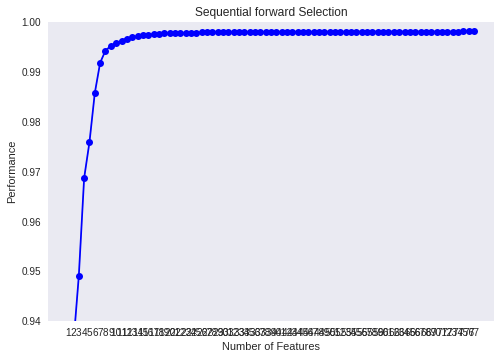

In [26]:
fig = plot_sequential_feature_selection(selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.94, 1])
plt.title('Sequential forward Selection')
plt.grid()
plt.show()

As we can see from both graph and output of training the optimal number of features is 25.

In [0]:
needed_features = selector.subsets_[25]['feature_idx']
train = train[:, needed_features]
test = test[:, needed_features]

### Now let's do the same for data without any drug info

In [14]:
data.drop([col for col in drug_cols if col not in prefixes['targets']], axis=1, inplace=True)
data.shape

(56897, 856)

In [15]:
  
  
train, test = train_test_split(data)
train_Ys = train[prefixes['targets']]
train.drop(prefixes['targets'], axis=1, inplace=True)
test_Ys = test[prefixes['targets']]
test.drop(prefixes['targets'], axis=1, inplace=True)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
fa = FactorAnalysis(n_components=100)
train = fa.fit_transform(train.values)
test = fa.transform(test.values)

In [17]:
clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000).fit(train, train_Ys['mj_user'])
accuracy = accuracy_score(test_Ys['mj_user'], clf.predict(test))
accuracy

0.9978207381370826

In [18]:
clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000)

selector = SFS(clf, forward=True, verbose=2, scoring='accuracy', cv=0,
               n_jobs=-1, k_features=90).fit(train, train_Ys['mj_user'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished

[2019-01-11 08:32:51] Features: 1/90 -- score: 0.943171166104237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   10.3s finished

[2019-01-11 08:33:02] Features: 2/90 -- score: 0.95856767904012[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:   11.7s finished

[2019-01-11 08:33:13] Features: 3/90 -- score: 0.9784401949756281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  97 out of  

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


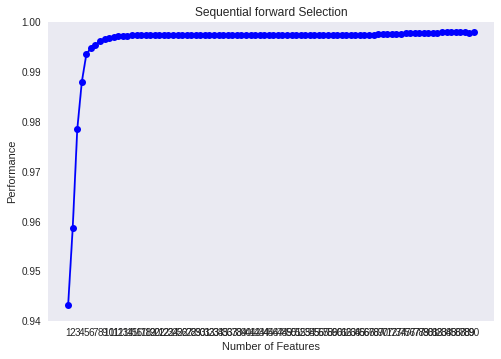

In [19]:
fig = plot_sequential_feature_selection(selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.94, 1])
plt.title('Sequential forward Selection')
plt.grid()
plt.show()

In [0]:
needed_features = selector.subsets_[20]['feature_idx']

influence of RSK

correlatin in fa to tune num of facs

docs percent